### Correlation Analysis
- Check for redundancy in the data.
- Check for correlation in the data.
- Prepare a heatmap of correlation and a pairplot of the data.
- Discuss how the correlation can be seen in the pairplot.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing_df = pd.read_csv('/home/jovyan/UCLA_CSX_450_2_2018_W/Project3_Housing/housing_data.csv',delim_whitespace=True, header=None)
housing_df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
housing_df.drop(['MEDV'], axis=1, inplace=True)

In [3]:
housing_df.shape

(506, 13)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [5]:
def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = KNeighborsRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

In [34]:
calculate_r_2_for_feature(housing_df,'CRIM')

0.24358240564325781

In [35]:
print("{:24} {}".format("CRIM: ", calculate_r_2_for_feature(housing_df,'CRIM')))
print("{:24} {}".format("ZN: ", calculate_r_2_for_feature(housing_df,'ZN')))
print("{:24} {}".format("INDUS: ", calculate_r_2_for_feature(housing_df,'INDUS')))
print("{:24} {}".format("CHAS: ", calculate_r_2_for_feature(housing_df,'CHAS')))
print("{:24} {}".format("NOX: ", calculate_r_2_for_feature(housing_df,'NOX')))
print("{:24} {}".format("RM: ", calculate_r_2_for_feature(housing_df,'RM')))
print("{:24} {}".format("AGE: ", calculate_r_2_for_feature(housing_df,'AGE')))
print("{:24} {}".format("DIS: ", calculate_r_2_for_feature(housing_df,'DIS')))
print("{:24} {}".format("RAD: ", calculate_r_2_for_feature(housing_df,'RAD')))
print("{:24} {}".format("TAX: ", calculate_r_2_for_feature(housing_df,'TAX')))
print("{:24} {}".format("PTRATIO: ", calculate_r_2_for_feature(housing_df,'PTRATIO')))
print("{:24} {}".format("B: ", calculate_r_2_for_feature(housing_df,'B')))
print("{:24} {}".format("LSTAT: ", calculate_r_2_for_feature(housing_df,'LSTAT')))

CRIM:                    0.27660259600482906
ZN:                      0.4763562856855319
INDUS:                   0.8380581754467288
CHAS:                    -0.39075409836065567
NOX:                     0.8112121807484919
RM:                      0.10777681653005167
AGE:                     0.4442459358577018
DIS:                     0.6919101109974142
RAD:                     0.9330871308973056
TAX:                     0.8719202026133284
PTRATIO:                 0.6823315161701053
B:                       0.06360159928968179
LSTAT:                   0.33097492161068387


In [36]:
def mean_r2_for_feature(data, feature):
    scores = []
    for _ in range(100):
        scores.append(calculate_r_2_for_feature(data, feature))
        
    scores = np.array(scores)
    return scores.mean()

In [37]:
print("{:24} {}".format("CRIM: ", mean_r2_for_feature(housing_df,'CRIM')))
print("{:24} {}".format("ZN: ", mean_r2_for_feature(housing_df,'ZN')))
print("{:24} {}".format("INDUS: ", mean_r2_for_feature(housing_df,'INDUS')))
print("{:24} {}".format("CHAS: ", mean_r2_for_feature(housing_df,'CHAS')))
print("{:24} {}".format("NOX: ", mean_r2_for_feature(housing_df,'NOX')))
print("{:24} {}".format("RM: ", mean_r2_for_feature(housing_df,'RM')))
print("{:24} {}".format("AGE: ", mean_r2_for_feature(housing_df,'AGE')))
print("{:24} {}".format("DIS: ", mean_r2_for_feature(housing_df,'DIS')))
print("{:24} {}".format("RAD: ", mean_r2_for_feature(housing_df,'RAD')))
print("{:24} {}".format("TAX: ", mean_r2_for_feature(housing_df,'TAX')))
print("{:24} {}".format("PTRATIO: ", mean_r2_for_feature(housing_df,'PTRATIO')))
print("{:24} {}".format("B: ", mean_r2_for_feature(housing_df,'B')))
print("{:24} {}".format("LSTAT: ", mean_r2_for_feature(housing_df,'LSTAT')))

CRIM:                    0.33755117930764195
ZN:                      0.4419580290605024
INDUS:                   0.8115843557465329
CHAS:                    0.02842542382449713
NOX:                     0.7608891327917228
RM:                      0.21616034576823082
AGE:                     0.6219214705005516
DIS:                     0.7916285346613949
RAD:                     0.9527253866675476
TAX:                     0.843339209846654
PTRATIO:                 0.5775186527145555
B:                       0.18218195211583815
LSTAT:                   0.4630055275087057


**Check for correlation in the data.**

In [41]:
corr = housing_df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


**Prepare a heatmap of correlation and a pairplot of the data.**

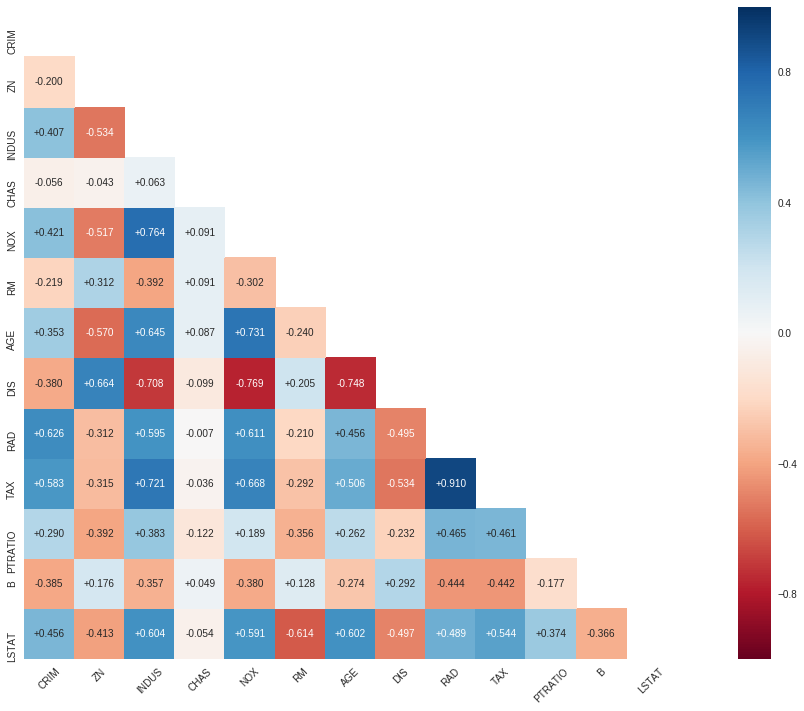

In [42]:
plt.figure(figsize = (22,12))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 0)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

**Discuss how the correlation can be seen in the heatmap.**

- TAX & RAD are highly correlated
- Other higher correlated data are between NOX & INDUS, TAX & INDUS, AGE & NOX
- DIS & INDUS, DIS & NOX, DIS & AGE have a negative corelation

28.22587823867798


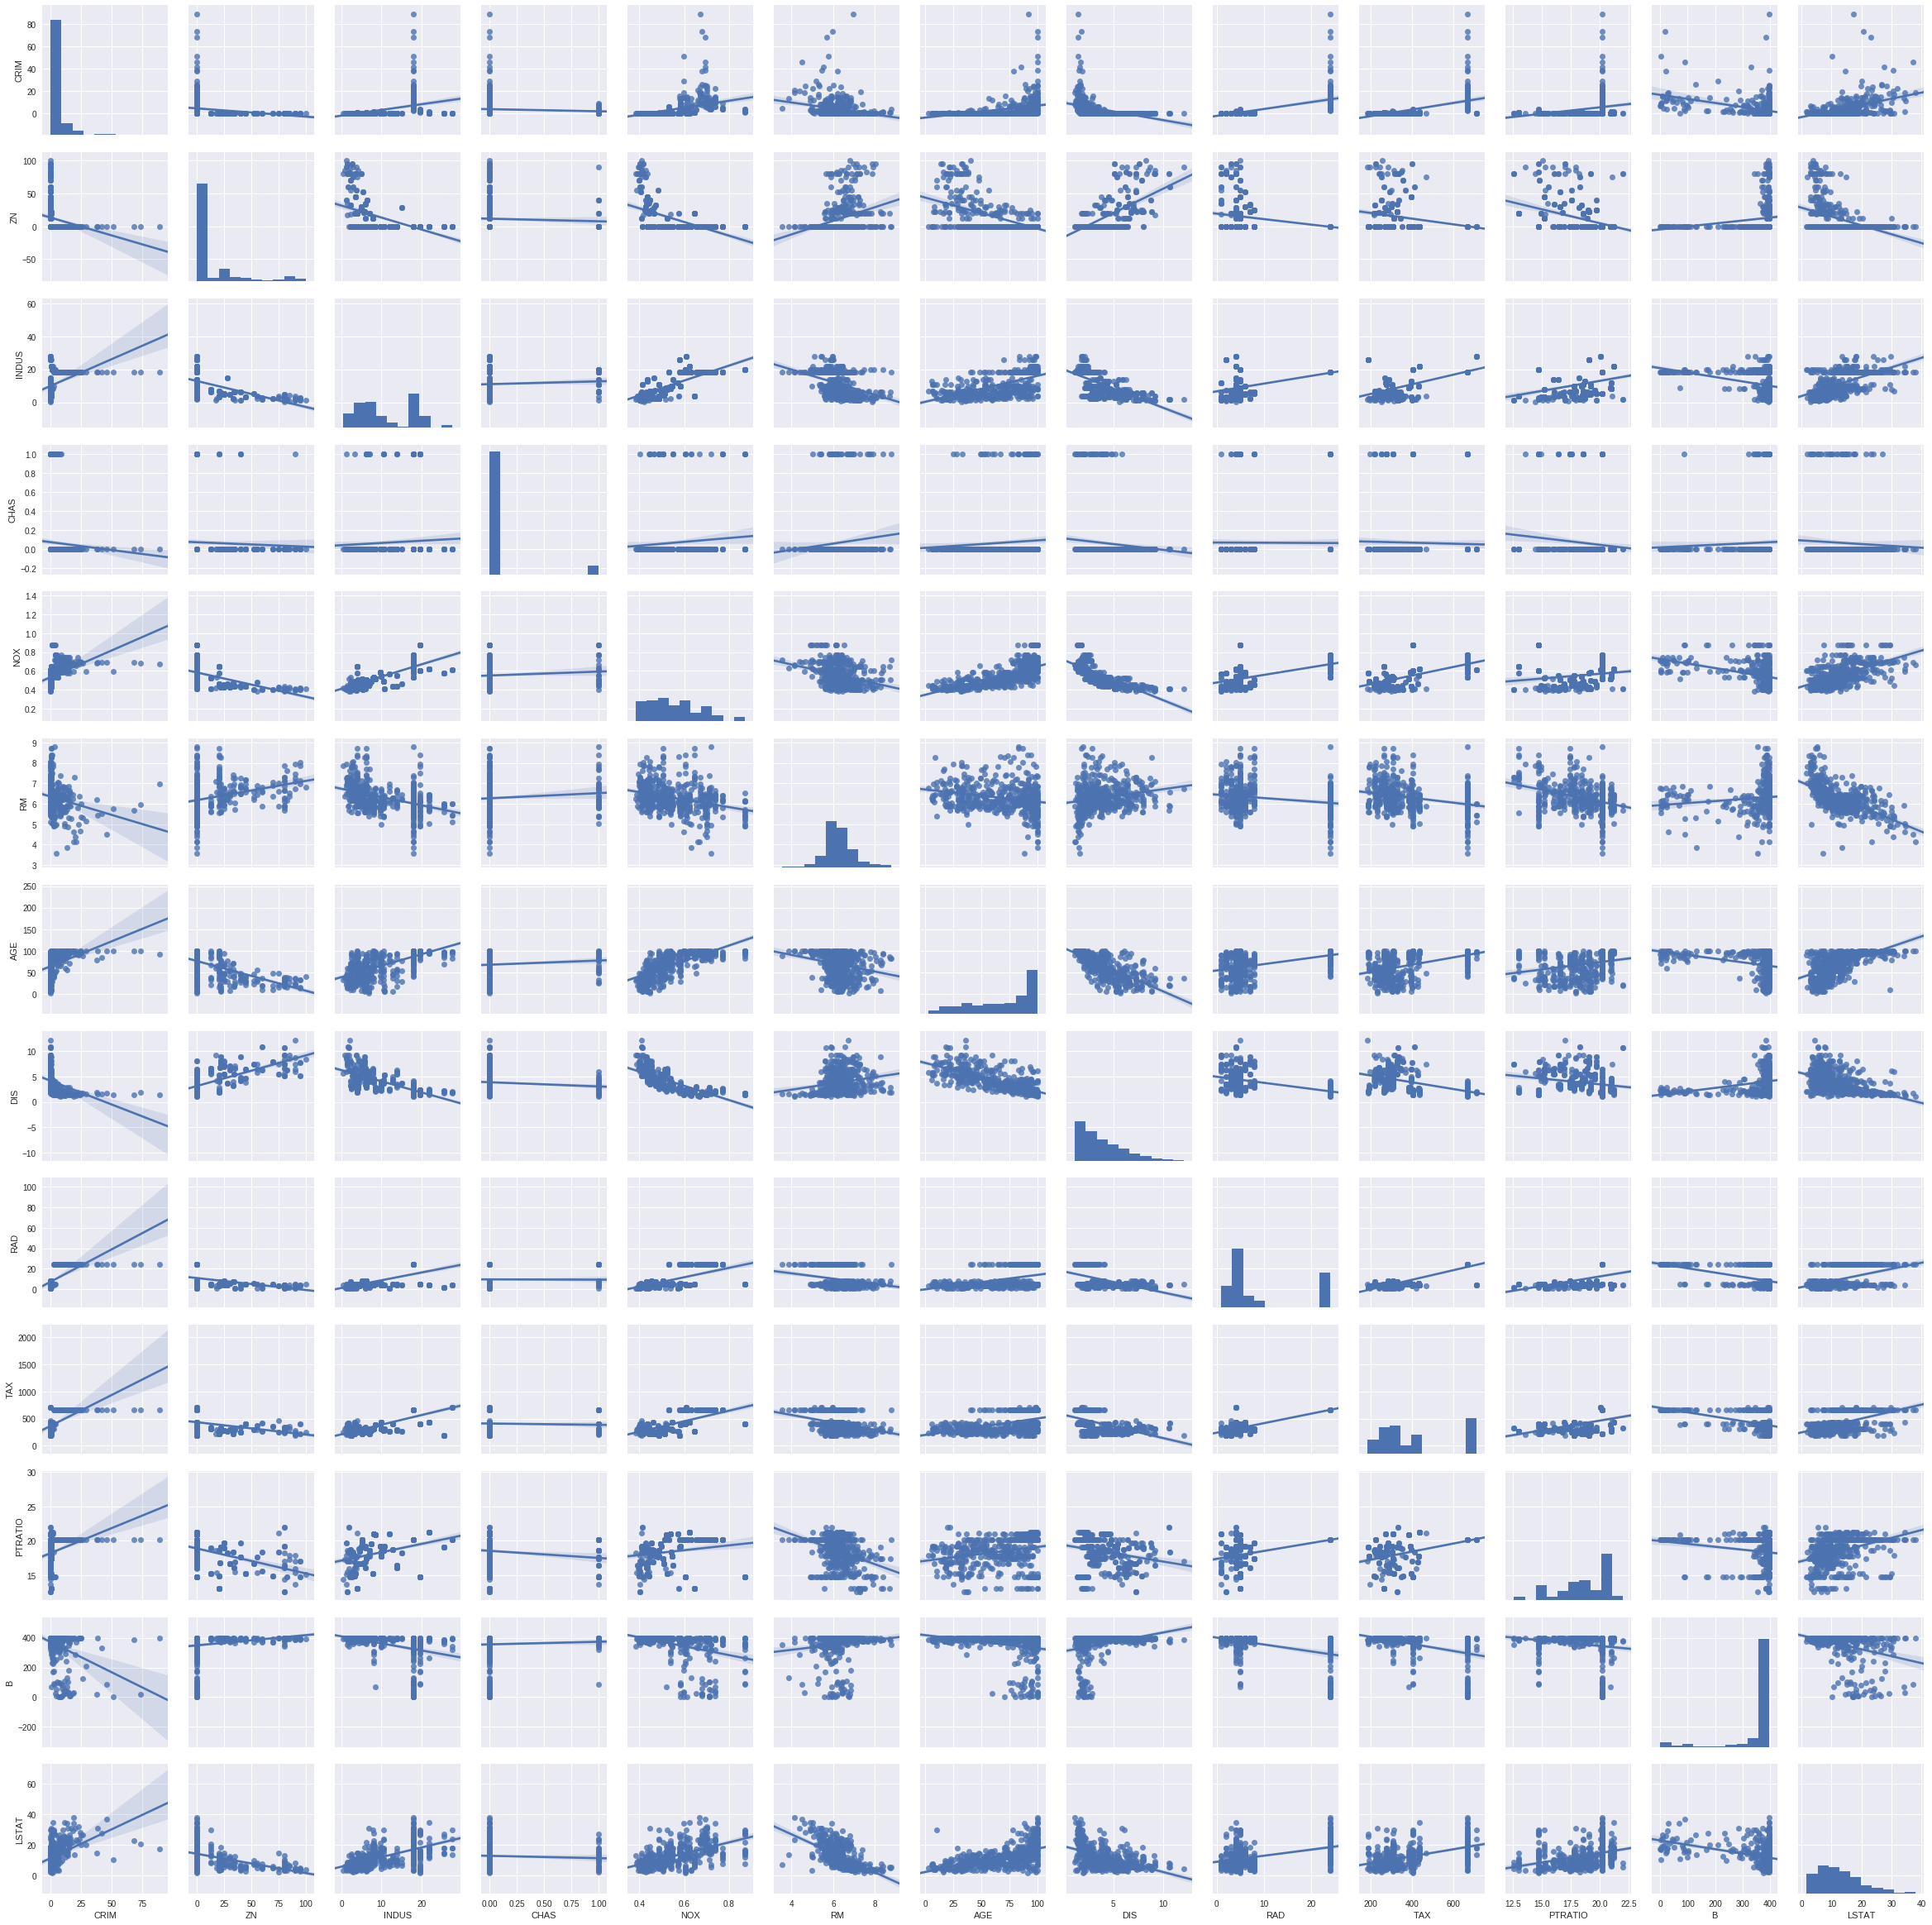

In [38]:
import time
start = time.time()
sns.pairplot(housing_df, kind='reg')
print(time.time() - start)

**Discuss how the correlation can be seen in the pairplot.**

Heatplot gives a quick view of correlation than pairplot.
In pairplot it clearly shows that TAX & RAD are positively correlated seeing the slope of line & positive index.
DIS with INDUS & NOX is negatively corelated.